<a href="https://colab.research.google.com/github/Marcusng88/WIA1007-Intro-to-DS/blob/main/tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use the salary data
2. Handles incomplete,noise and inconsistent values

#Data Preprocessing-Cleaning



1.   Incomplete (Missing values)
2.   Noise(Either errors)
3.   Inconsistent



In [37]:
import pandas as pd
import numpy as np

In [38]:
# pd.read_csv() is a function from pandas libray
# from google.colab import drive
# drive.mount('/content/drive')     this is an alternative to mount the drive
df = pd.read_csv("/content/drive/MyDrive/Dataset/salary.csv")


In [39]:
#df.rename(columns={old name : new name},inplace = True ) this
# changes the name of the columns ,if inplace = true ,it will replace the new one
#with the old one
df.rename(columns={
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Salary",
    'How old are you?': 'Age',
    'What industry do you work in?': 'Industry',
    'If your job title needs additional context, please clarify here:':'Context',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':'Compensation',
    'Please indicate the currency':'Currency',
    'If "Other," please indicate the currency here: ':'Other currency',
    'If your income needs additional context, please provide it here:':'Income context',
    'What country do you work in?':'Country',
    'If you\'re in the U.S., what state do you work in?':'City(if US)',
    'What city do you work in?':'City',
    'How many years of professional work experience do you have overall?':'Work experience(overall)',
    'How many years of professional work experience do you have in your field?':'Work experience(field)',
    'What is your highest level of education completed?':'Education',
    'What is your gender?':'Gender',
    'What is your race? (Choose all that apply.)':'Race'},inplace = True)


In [40]:

# this replace comma with '' 55,000 to 55000
df.rename(columns={"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Salary"},inplace = True)
df['Salary'] = df['Salary'].replace(',','',regex=True)
# convert "salary" string to integers
df['Salary'] = df['Salary'].astype(int)

df.head()

,Timestamp,Age,Industry,Job title,Context,Salary,Compensation,Currency,Other currency,Income context,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [41]:
df.isna().sum() # this shows the total number of missing values per column


,0
Timestamp,0
Age,0
Industry,74
Job title,1
Context,20826
Salary,0
Compensation,7309
Currency,0
Other currency,27888
Income context,25052


#1. Incomplete data/Missing values
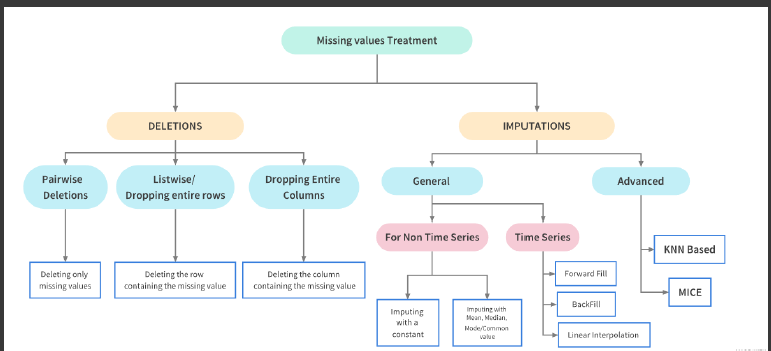

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28097 entries, 0 to 28096
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 28097 non-null  object 
 1   Age                       28097 non-null  object 
 2   Industry                  28023 non-null  object 
 3   Job title                 28096 non-null  object 
 4   Context                   7271 non-null   object 
 5   Salary                    28097 non-null  int64  
 6   Compensation              20788 non-null  float64
 7   Currency                  28097 non-null  object 
 8   Other currency            209 non-null    object 
 9   Income context            3045 non-null   object 
 10  Country                   28097 non-null  object 
 11  City(if US)               23067 non-null  object 
 12  City                      28015 non-null  object 
 13  Work experience(overall)  28097 non-null  object 
 14  Work e

In [43]:
# Write a code to return the number of rows with missing values under the column 'compensation'
df['Compensation'].isna().sum()

7309

#1.1 Dropping columns with too many missing values

In [44]:
# This drops the columns with too many missing values(useless columns)
df = df.drop(columns=['Context','Other currency','Income context'])

1.2 Quick analysis of missing values - Compensation





In [45]:
x = df[df['Compensation'].isna()]
x.head()

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000,NaN,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,50000,NaN,USD,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
14,4/27/2021 11:03:11,18-24,Health care,Patient care coordinator,32000,NaN,CAD,Canada,NaN,Remote,1 year or less,1 year or less,College degree,Woman,White
17,4/27/2021 11:03:19,45-54,Art & Design,graphic designer,59000,NaN,USD,usa,California,Pomona,21 - 30 years,21 - 30 years,College degree,Woman,White


One sensible way is to impute NaN values for Compensation based on the industry.For example below,we have records where other people in the librarian industry receives zero compensation

so similarly, we can impute 0 in the compensation where industry is library

In [46]:
df[df['Industry']=='Librarian']

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
2450,4/27/2021 11:44:24,35-44,Librarian,"Digital Initiatives Archivist, Senior",66703,0.0,USD,United States,Florida,Ft. Lauderdale,11 - 20 years,11 - 20 years,Master's degree,Woman,White
13187,4/28/2021 12:11:05,35-44,Librarian,Adult Services Librarian,45700,NaN,USD,USA,New York,Johnson City,8 - 10 years,5-7 years,Master's degree,Non-binary,White
21760,4/30/2021 16:24:12,25-34,Librarian,teen librarian,40700,0.0,USD,USA,Ohio,Marion,8 - 10 years,11 - 20 years,Master's degree,Woman,White


#1.3 dropping missing values

we can drop missing values here using dropna() function

if we drop without specifying any parameter, it will drop rows even have only one missing value

dropna(thesh=2) drop rows that has >2 missing values

dropna(how=all) drop only rows where all values are missing


In [47]:
df.info()
print('\n\n\n')
df_dropna = df.dropna()
df_dropna.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28097 entries, 0 to 28096
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 28097 non-null  object 
 1   Age                       28097 non-null  object 
 2   Industry                  28023 non-null  object 
 3   Job title                 28096 non-null  object 
 4   Salary                    28097 non-null  int64  
 5   Compensation              20788 non-null  float64
 6   Currency                  28097 non-null  object 
 7   Country                   28097 non-null  object 
 8   City(if US)               23067 non-null  object 
 9   City                      28015 non-null  object 
 10  Work experience(overall)  28097 non-null  object 
 11  Work experience(field)    28097 non-null  object 
 12  Education                 27874 non-null  object 
 13  Gender                    27926 non-null  object 
 14  Race  

# 1.4 Impute missing values with most frequent

a simple method where we dont analyse per column

we can impute missing values for all related columns using most frequent

impured values can be the mean ,median .this is changed in the 'strategy' parameter

there are other simple methods for imputing missing values. eg fill.na()

In [48]:
from sklearn.impute import SimpleImputer

df2 = df.copy()# so that not overwriting the original dataframe
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = most_frequent_imputer.fit_transform(df)
df.head()


,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,California,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


#2. Noisy data
noise can be random errors and /or outliers

it can also be non sensible data

#2.1 Remove outliers
use boxplot or histograms to find outlier(df.boxplot() or df.hist())

outliers are values that are way higher or lower than most of the data.Usually there are not many data points like this.so we can consider this as noise

it seems salary and compensation has many outliers.lets remove them

<Axes: >

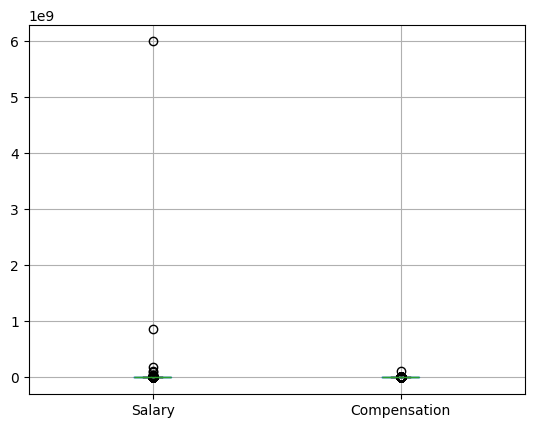

In [49]:
df.boxplot()

<Axes: >

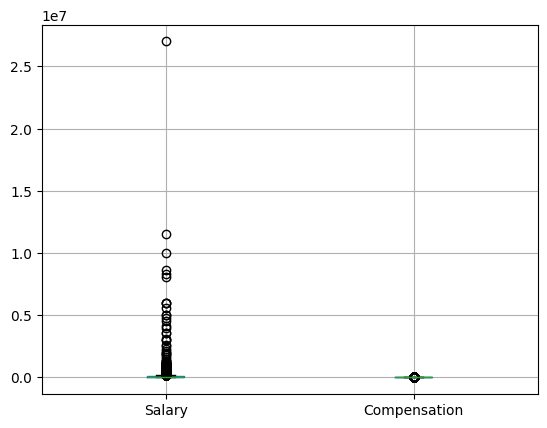

In [50]:
from scipy import stats
# this remove outliers data ,data that is bigger than 0.75 in term of z score
#abs because need to consider both positive and negative standard deviations
df= df[(np.abs(stats.zscore(df['Salary']))<0.75)]
df= df[(np.abs(stats.zscore(df['Compensation']))<0.75)]

df.boxplot()

# 2.2 remove non sensible values

use df.describe()

In [56]:
print(df['Salary'].describe())
print('is it really true that min is zero?',df['Salary'].min())
salary_zero = df[df['Salary']==0]
print(len(salary_zero))

df[df['Salary']==0].count()
df[df['Salary']==0]['Salary'].count()

count    2.687100e+04
mean     9.158020e+04
std      2.447592e+05
min      0.000000e+00
25%      5.300000e+04
50%      7.450000e+04
75%      1.040000e+05
max      2.700000e+07
Name: Salary, dtype: float64
is it really true that min is zero? 0
16


16

In [57]:
df[df['Salary']==0]

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
8739,4/27/2021 16:34:56,35-44,Stay-at-home parent,"""mum"" ;)",0,0.0,USD,US,Kentucky,Louisville,21 - 30 years,8 - 10 years,Master's degree,Woman,White
10362,4/27/2021 20:40:16,35-44,Nonprofits,Executive Director,0,0.0,USD,Usa,North Dakota,Charlotte,11 - 20 years,11 - 20 years,Master's degree,Other or prefer not to answer,White
13537,4/28/2021 13:01:52,25-34,Education (Primary/Secondary),Student teacher,0,0.0,USD,USA,Connecticut,New. Haven,2 - 4 years,2 - 4 years,Master's degree,Woman,"Middle Eastern or Northern African, White"
15238,4/28/2021 16:45:53,18-24,Computing or Tech,Product Marketer,0,0.0,USD,United States,California,Santa Clara,1 year or less,1 year or less,College degree,Man,Asian or Asian American
15334,4/28/2021 17:03:17,45-54,Education (Primary/Secondary),Househusband,0,0.0,USD,USA,California,Palo Alto,5-7 years,5-7 years,PhD,Man,White
20208,4/29/2021 13:13:20,45-54,Computing or Tech,Founder,0,0.0,USD,United States,California,San Jose,21 - 30 years,21 - 30 years,Some college,Woman,White
20470,4/29/2021 14:37:40,35-44,"Marketing, Advertising & PR",Unemployed,0,0.0,USD,US,Oregon,Portland,21 - 30 years,5-7 years,Master's degree,Man,White
23028,5/1/2021 11:50:43,25-34,Nonprofits,Government Relations Director,0,0.0,USD,United States,Maryland,Lexington Park,8 - 10 years,2 - 4 years,Master's degree,Woman,White
26562,7/20/2021 14:58:53,under 18,"Accounting, Banking & Finance",na,0,0.0,USD,na,Alabama,na,1 year or less,1 year or less,High School,Man,Asian or Asian American
26748,9/8/2021 21:11:15,18-24,student,College Senior,0,0.0,USD,United States of America,Georgia,Milledgeville,5-7 years,1 year or less,Some college,Man,White


In [58]:
df[df['Salary']<500]

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,City(if US),City,Work experience(overall),Work experience(field),Education,Gender,Race
97,4/27/2021 11:05:08,55-64,Environmental regulation,Quality Assurance Lead,58,0.0,USD,USA,Maryland,Baltimore,21 - 30 years,8 - 10 years,Master's degree,Woman,White
166,4/27/2021 11:06:07,25-34,Health care,occupational therapist,35,0.0,EUR,finland,California,helsinki,2 - 4 years,2 - 4 years,College degree,Woman,White
895,4/27/2021 11:16:37,45-54,Education (Primary/Secondary),Special Education Teacher,38,0.0,USD,USA,Idaho,Pocatello,21 - 30 years,11 - 20 years,Master's degree,Woman,White
968,4/27/2021 11:17:54,25-34,Media & Digital,Managing Editor,61,0.0,USD,United States,Maryland,Bethesda,5-7 years,5-7 years,College degree,Woman,White
1607,4/27/2021 11:28:23,25-34,Agriculture or Forestry,Chief Data Scientist,130,0.0,USD,USA,New Mexico,Santa Fe,8 - 10 years,8 - 10 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28020,3/19/2024 17:40:39,25-34,Student,Student,0,0.0,USD,US,Illinois,Boston,1 year or less,1 year or less,College degree,Other or prefer not to answer,White
28026,4/5/2024 2:48:47,35-44,Retail,CRM manager,70,0.0,EUR,Germany,California,Berlin,8 - 10 years,5-7 years,Master's degree,Woman,White
28049,6/28/2024 14:00:00,25-34,Education (Higher Education),fasd,5,0.0,EUR,ff,"Colorado, Delaware, New Jersey, West Virginia,...",ff,21 - 30 years,5-7 years,College degree,Woman,White
28093,11/18/2024 7:24:09,45-54,Computing or Tech,CYBER SECURITY,40,1200.0,EUR,germany,"Delaware, Louisiana",Düsseldorf,2 - 4 years,2 - 4 years,High School,Man,Asian or Asian American


#3. Inconsistent data




*  find duplicated rows,for example university malaya,um,universiti malaya should be the same.one way is to use fuzzy matching(fuzzywuzzy package)


*  find typos warning,this is very tedious


#3.1 Check for each columns.Example is 'Gender'



*   print out the unique items for each
columns using df['columns'].unique()
*   you will see some are not that unique. using the 'Gender' column , i found that there is 'Other or prefer not to answer' and 'Prefer not to answer'.lets just group them into 'Other'
*Try checking columns with the lowest number of unique items first




In [59]:
print('--columns and their number of unique items--')
df.nunique()

--columns and their number of unique items--


,0
Timestamp,24255
Age,7
Industry,1197
Job title,13920
Salary,3567
Compensation,634
Currency,11
Country,370
City(if US),131
City,4744


In [60]:
# forcing colab to print out all in the y (stored as ndarray)
import sys
np.set_printoptions(threshold=sys.maxsize)
y=df['Industry'].unique()
print(f'there are {len(y)} unique items ')
print (y)

there are 1197 unique items 
['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' 'Nonprofits' 'Publishing'
 'Education (Primary/Secondary)' 'Law' 'Health care'
 'Utilities & Telecommunications' 'Business or Consulting' 'Art & Design'
 'Government and Public Administration' 'Public Library'
 'Engineering or Manufacturing' 'Media & Digital'
 'Marketing, Advertising & PR' 'Retail' 'Property or Construction'
 'Biotechnology' 'Aerospace contracting' 'Insurance' 'Sales' 'Energy'
 'Environmental regulation' 'Hospitality & Events'
 'Transport or Logistics' 'Medical Devices'
 'Academic research (Psychology)' 'Social Work' 'public library'
 'Surveying ' 'Recruitment or HR' 'PhD' 'Biopharma' 'STEM research'
 'Libraries' 'Architecture' 'Academic Medicine ' 'Commercial Real Estate '
 'Pet care industry (dog training/walking)' 'Politics'
 'University administration' 'Animal Health Product Manufacturing'
 'Educational Technology - hybrid between book publishing and te